## 机器学习

利用数据进行学习和预测的模型方法或算法

+ 有监督学习

   对特定的目标变量进行预测，并且有目标变量的数据可以利用。在监督学习Supervised learning,有一个变量可以对照，优化一般有比较明确的目标。
   
  - 回归
  - 分类
+ 无监督学习

  无特定的目标变量，目的是探索数据内的规律
  
  - 聚类,用户画像
  

## 分类回归的基本概念
+ 数据 $(\mathbf{x_1},y_1),(\mathbf{x_2},y_2),\ldots,(\mathbf{x_N},y_N)\sim (X,Y)$
+ 有监督学习: $\hat{y}_i=f(\mathbf{x_i})$
+ 分类和回归
+ 训练样本(training data)，检验样本（test data） 
+ 评估：错误率,有多少样本被错误分类，定义为： $$\frac{1}{N}\sum_{i=1}^N{I}(f(\mathbf{x}_i)\neq y_i)$$
+ 评估：查准率，查全率 (两分类问题)
     
    + True Positive （真正, TP）被模型预测为正的正样本；  
    True Negative（真负 , TN）被模型预测为负的负样本；  
    False Positive （假正, FP）被模型预测为正的负样本；      
     False Negative（假负 , FN）被模型预测为负的正样本；
     
    + 查准率（ precision, TPR),被预测为正的样本的确是正的概率：$P = \frac{TP}{（TP + FP）}$ 
       
    +  查全率（recall） ,正的样本被识别出来的概率, $R =  \frac{TP}{TP + FN} $
 

# Scikit-Learn库

[scikit-learn: machine learning in Python — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/index.html)
 
![](scikit_learn.png)

[基于 Python 和 Scikit-Learn 的机器学习介绍 - Python - 伯乐在线](http://python.jobbole.com/81721/)




### 朴素贝叶斯 （Naive Bayesian）

它也是最有名的机器学习的算法之一,这个方法通常在多类的分类问题上表现的很好。

### k-最近邻 (k-nearnest neighbor)

kNN（k-最近邻）通过分析相邻样本的目标变量进行判断。 有时候，一个简单的kNN算法在良好选择的特征上会有很出色的表现。当参数（主要是metrics）被设置得当，这个算法在分类或回归问题中通常表现很好。
### 逻辑回归 (logistic regression)

大多数情况下被用来解决分类问题（二元分类），但多分类也适用。这个算法的优点是对于每一个输出的对象都有一个对应类别的概率。

## 决策树 (Decision Tree)

分类和回归树（CART）是最经典的决策树方法，在这类问题中对象有可分类的特征且被用于回归和分类问题。决策树很适用于多类分类。

# Native Bayesian classifer


理论上，概率模型分类器是一个条件概率模型。
$$p(Y \vert X_1,\dots,X_n)\,$$
独立的类别变量$Y$有若干类别，条件依赖于若干特征变量
$X_1$,$X_2$,...,$X_n$。但问题在于如果特征数量$n$较大或者每个特征能取大量值时，基于概率模型列出概率表变得不现实。所以我们修改这个模型使之变得可行。

 贝叶斯定理有以下式子：
 
$$p(Y \vert X_1,\dots,X_n) = \frac{p(Y) \ p(X_1,\dots,X_n\vert Y)}{p(X_1,\dots,X_n)}. \,$$
 

实际中，我们只关心分式中的分子部分，因为分母不依赖于$Y$而且特征$X_i$的值是给定的，可以认为是一个常数。这样分子就等价于联合分布模型。
 $p(Y, X_1, \dots, X_n)\,$
 
 

重复使用链式法则，可将该式写成条件概率的形式，如下所示：

 $$\begin{aligned}p(Y,& X_1, \dots, X_n)\\  
 & \varpropto p(Y) \ p(X_1,\dots,X_n\vert Y)\\ 
 &\varpropto p(Y) \ p(X_1\vert Y) \ p(X_2,\dots,X_n\vert Y, X_1)\\
 &\varpropto p(Y) \ p(X_1\vert Y) \ p(X_2\vert Y, X_1) \ p(X_3,\dots,X_n\vert Y, X_1, X_2)\\
 &\varpropto p(Y) \ p(X_1\vert Y) \ p(X_2\vert Y, X_1) \ p(X_3\vert Y, X_1, X_2) \ p(X_4,\dots,X_n\vert Y, X_1, X_2, X_3)\\
 &\varpropto p(Y) \ p(X_1\vert Y) \ p(X_2\vert Y, X_1) \ p(X_3\vert Y, X_1, X_2) \ \dots p(X_n\vert Y, X_1, X_2, X_3,\dots,X_{n-1}).\end{aligned}$$
 
现在“朴素”的**条件独立**假设开始发挥作用:假设每个特征$X_i$对于其他特征$X_j$,$j\neq i$是条件独立的。

这就意味着
$p(X_i \vert Y, X_j) = p(X_i \vert Y)\,$
对于$i\ne j$，所以联合分布模型可以表达为
 $$ \begin{align}
p(Y \vert X_1, \dots, X_n) & \varpropto p(Y, X_1, \dots, X_n)\\ & \varpropto p(Y) \ p(X_1\vert Y) \ p(X_2\vert Y) \ p(X_3\vert Y) \ \cdots\, \\& \varpropto p(Y) \prod_{i=1}^n p(X_i \vert Y).\,\end{align}$$

这意味着上述假设下，类变量$Y$的条件分布可以表达为：
$$p(Y \vert X_1,\dots,X_n) = \frac{1}{Z}  p(Y) \prod_{i=1}^n p(X_i \vert Y)$$

其中$Z$(证据因子)是一个只依赖与$X_1,\dots,X_n$等的缩放因子，当特征变量的值已知时是一个常数。
表达式分解为类先验概率$p(Y)$和独立概率分布$p(X_i\vert Y)$，概率模型的操作性得到很大的提高。如果这是一个$k$分类问题，且每个$p(X_i\vert Y=y)
$可以表达为$r$个参数，于是相应的朴素贝叶斯模型有$(k − 1) + nrk$个参数。最简单应用中，取$k=2$（二分类问题），$r=1$ (伯努利分布作为特征），因此模型的参数个数为$2n+1$，其中$n$是二值分类特征的个数。

### 从概率模型中构造分类器 
 
 Naive 分类器包括了模型和相应的决策规则。一个普通的规则就是选出最有可能的那个：这就是大家熟知的**最大后验概率**（MAP）决策准则。相应的分类器是如下定义的：
$$\mathrm{classify}(X_1,\dots,X_n) = \underset{y}{\operatorname{argmax}} \ p(Y=y) \displaystyle\prod_{i=1}^n p(X_i=X_i\vert Y=y).$$


sklearn.naive_bayes:


BernoulliNB
Naive Bayes classifier for multivariate Bernoulli models.

CategoricalNB
Naive Bayes classifier for categorical features.

ComplementNB
Complement Naive Bayes classifier.

GaussianNB
Gaussian Naive Bayes.


In [1]:
import sklearn.naive_bayes as nb

In [7]:
nb.BernoulliNB?

In [15]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y) 
print(clf.predict(X))

[1 2 3 4 4 5]


### Binary Logistic Regression

+ 一些设定
  1. 响应变量$Y_i$是二值的
  2. 响应变量的因子1是我们真正关心的水平
  3. 解释变量对响应取值都有影响
  4. 解释变量彼此独立，也就是说，模型应该没有或较小的共线性
  5. 解释变量对响应变量概率 $P(Y_i=1|\mathbf X)$的函数有线性关系
  6. 有较多的样本 

### 关于5.的进一步解释
 
+ Odds 优势：$\frac{p}{1-p}$
+ 优势的对数为Logit： 

$$\text{logit } p = \log \frac{p}{1-p}$$ 

+ logistic 回归模型：
 

$$\text{logit } P(Y_i=1|   X_i) = { X}_i\beta$$ 

注意这里$\beta$是向量，对应常数项和每个$X_i$的系数项。

+ 变形为：

$$P(Y_i=1|  X_i) =  \frac{\exp (X_i\beta)}{1+\exp(X_i\beta)}$$ 


   

+ 其中  $\frac{\exp (x)}{1+\exp(x)}$也称为 logistic函数 或者 sigmoid函数。


### Logistic 回归的参数估计

+ 参数为 $\beta$
+ 似然函数 (下面我们用小写字母表示观测)：
   $$l(\beta)=\sum_{i=1}^n \log p_i= \sum_{i=1}^n \log  P(Y_i=y_i| x_i)$$
+ 注意$y_i=1$或者 $y_i=0$，上面的公式可以写为：
    $$\begin{array}{rl}l(\beta)&=\sum_{i=1}^n \left[y_i\log  P(Y_i=1| x_i)+(1-y_i) \log  P(Y_i=0| x_i)\right]\\
   &= \sum_{i=1}^n \left[y_i\log  P(Y_i=1| x_i)+(1-y_i) \log (1- P(Y_i=1| x_i))\right]\\
    &= \sum_{i=1}^n \left[y_i\log (\frac{\exp (x_i\beta)}{1+\exp(x_i\beta)})  +(1-y_i) \log (1- (\frac{\exp (x_i\beta)}{1+\exp(x_i\beta)}))\right]\\
     &= \sum_{i=1}^n \left[y_i\log (\frac{\exp (x_i\beta)}{1+\exp(x_i\beta)})  +(1-y_i) \log (  \frac{1}{1+\exp(x_i\beta)} )\right]\\
        &= \sum_{i=1}^n \left[y_i x_i\beta -\log (1+\exp(x_i\beta) )\right]\\
    \end{array}$$
  
+  极大似然估计为：
   $$\hat \beta = \arg\max_\beta \sum_{i=1}^n \left[y_i x_i\beta -\log (1+\exp(x_i\beta) )\right] $$
 注意： 该函数是凹函数,优化相对容易收敛。
 

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
%matplotlib inline

In [17]:
#ccard=sm.datasets.ccard.load_pandas().data
#ccard=pd.read_csv("http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF9-1.txt")
dta=pd.read_csv("data\TableF9-1.csv")

+ http://pages.stern.nyu.edu/~wgreene/Text/econometricanalysis.htm
+ MDR = Number of derogatory reports
+ Acc = Credit card application accepted (1=yes),
+ Age = Age in years+ 12ths of a year,
+ Income = Income, divided by 10,000 ,
+ Avgexp = Avg. monthly credit card expenditure,
+ Ownrent = OwnRent, individual owns (1) or rents (0) home.
+ Selfempl = Self employed (1=yes, 0=no)
+ 我们的目标是预测Acc，探讨影响变量

In [4]:
dta.groupby('ACC').mean()

,MDR,AGE,INCOME,AVGEXP,OWNRENT,SELFEMPL
ACC,,,,,,
0,1.037037,34.592593,3.255556,0.000000,0.333333,0.111111
1,0.109589,31.150685,3.411370,258.935753,0.369863,0.027397



+ AVGEXP 是事后的变量，ACC是不能用的
+ 下面看下各变量的情况

In [5]:
dta=dta.drop(axis=1,columns="AVGEXP")
dta.groupby('MDR').mean()

,ACC,AGE,INCOME,OWNRENT,SELFEMPL
MDR,,,,,
0,0.804878,31.658537,3.302195,0.378049,0.060976
1,0.600000,33.900000,3.575000,0.300000,0.000000
2,0.333333,31.666667,4.630000,0.000000,0.000000
3,0.000000,37.666667,4.003333,0.333333,0.000000
4,0.000000,35.000000,1.500000,0.000000,0.000000
7,0.000000,30.000000,3.000000,1.000000,0.000000


Text(0, 0.5, 'Frequency')

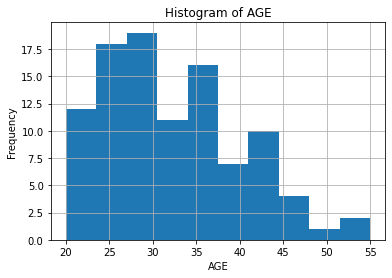

In [6]:
dta.AGE.hist()
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

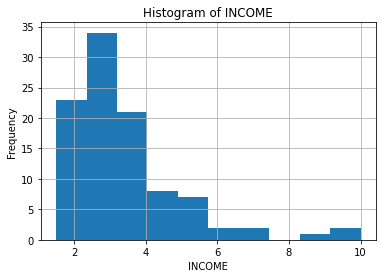

In [9]:
dta.INCOME.hist()
plt.title('Histogram of INCOME')
plt.xlabel('INCOME')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

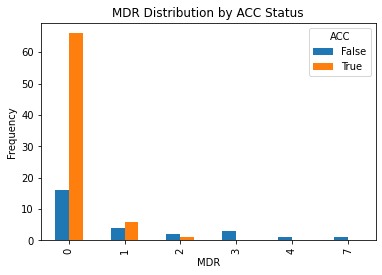

In [10]:
# barplot of MDR grouped by ACC (True or False)
pd.crosstab(dta.MDR, dta.ACC.astype(bool)).plot(kind='bar')
plt.title('MDR Distribution by ACC Status')
plt.xlabel('MDR')
plt.ylabel('Frequency')
#OWNRENT,SELFEMPL

Text(0, 0.5, 'Frequency')

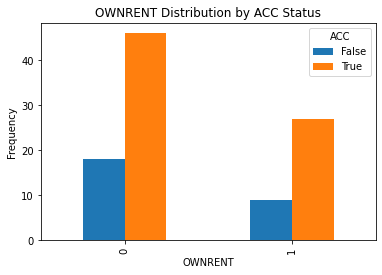

In [11]:
# barplot of OWNRENT grouped by ACC (True or False)
pd.crosstab(dta.OWNRENT, dta.ACC.astype(bool)).plot(kind='bar')
plt.title('OWNRENT Distribution by ACC Status')
plt.xlabel('OWNRENT')
plt.ylabel('Frequency')
#OWNRENT,SELFEMPL

In [12]:
dta=dta.rename(columns={"SELFEMPL ":"SELFEMPL"})

Text(0, 0.5, 'Frequency')

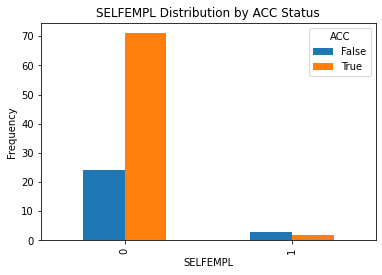

In [13]:
# barplot of SELFEMPL grouped by ACC (True or False)
pd.crosstab(dta.SELFEMPL, dta.ACC.astype(bool)).plot(kind='bar')
plt.title('SELFEMPL Distribution by ACC Status')
plt.xlabel('SELFEMPL')
plt.ylabel('Frequency') 

In [14]:
dta.columns

Index(['MDR', 'ACC', 'AGE', 'INCOME', 'OWNRENT', 'SELFEMPL'], dtype='object')

In [15]:
# create dataframes with an intercept column and dummy variables for
#  'OWNRENT' and 'SELFEMPL' 
y, X = dmatrices('ACC ~ MDR  + AGE + INCOME + C(OWNRENT) + C(SELFEMPL)',
                  dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(OWNRENT)[T.1]', 'C(SELFEMPL)[T.1]', 'MDR', 'AGE',
       'INCOME'],
      dtype='object')


In [17]:
X

,Intercept,C(OWNRENT)[T.1],C(SELFEMPL)[T.1],MDR,AGE,INCOME
0,1.0,1.0,0.0,0.0,38.0,4.52
1,1.0,0.0,0.0,0.0,33.0,2.42
2,1.0,1.0,0.0,0.0,34.0,4.50
3,1.0,0.0,0.0,0.0,31.0,2.54
4,1.0,1.0,0.0,0.0,32.0,9.79
...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,22.0,1.56
96,1.0,1.0,0.0,1.0,33.0,6.00
97,1.0,0.0,0.0,1.0,25.0,3.60
98,1.0,1.0,0.0,0.0,26.0,5.00


In [18]:
y = np.ravel(y)
#  A column-vector y was passed when a 1d array was expected.

### Logistic Reg

In [14]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(max_iter=1000)
modelres = model.fit(X, y)
print(X.columns)
print(modelres.coef_[0])


Index(['Intercept', 'C(OWNRENT)[T.1]', 'C(SELFEMPL)[T.1]', 'MDR', 'AGE',
       'INCOME'],
      dtype='object')
[ 1.09348933e-05  5.84694955e-02 -1.26789758e+00 -1.18210964e+00
 -6.52392572e-02  2.44608895e-01]


In [15]:
# check the accuracy on the training set
print(modelres.score(X, y))
# what percentage application accepted?
print(y.mean())

0.78
0.73


In [16]:
data = {'y_Actual':   y,
        'y_Predicted': modelres.predict(X) 
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df)
#modelres.predict_proba(X)

    y_Actual  y_Predicted
0        1.0          1.0
1        1.0          1.0
2        1.0          1.0
3        1.0          1.0
4        1.0          1.0
..       ...          ...
95       1.0          1.0
96       1.0          1.0
97       1.0          1.0
98       1.0          1.0
99       1.0          1.0

[100 rows x 2 columns]


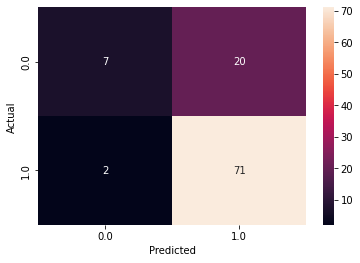

In [17]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [18]:
print(metrics.confusion_matrix(y, model.predict(X)))
print(metrics.classification_report(y, model.predict(X)))

[[ 7 20]
 [ 2 71]]
              precision    recall  f1-score   support

         0.0       0.78      0.26      0.39        27
         1.0       0.78      0.97      0.87        73

    accuracy                           0.78       100
   macro avg       0.78      0.62      0.63       100
weighted avg       0.78      0.78      0.74       100



# 决策树

http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index

 

![](B03905_05_01-compressor.png)

### scikit-learn决策树结果的可视化

决策树可视化可以方便我们直观的观察模型，以及发现模型中的问题。

### 决策树可视化环境搭建
scikit-learn中决策树的可视化一般需要安装graphviz。主要包括graphviz的安装和python的graphviz插件的安装。

   + 第一步是安装graphviz。下载地址是： http://www.graphviz.org/ 。如果你是Linux系统，可以用apt-get或者yum的方法安装。如果是Windows，就在官网上下载msi文件安装。无论是Linux还是Windows，装完后都要设置环境变量，将graphviz的bin目录加到PATH中，比如我是Windows，则需要将C:\Program Files\Graphviz\bin\加入到PATH中。
    
   + 第二步是安装python的graphviz插件，执行下面的安装命令即可： pip install graphviz。(conda)
    
   + 第三步是安装python的pydotplus（或者 pydot插件），执行下面的安装命令即可：pip install pydotplus。(conda),或者 pip install pydot
    
   + 第四步是安装ipython的notebook，执行下面的安装命令即可：pip install notebook。
    
这样环境就搭建好了，有时候python会很笨，仍然找不到graphviz，这时，可以在代码里面加入这一行：
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
注意后面的路径是你自己的graphviz的bin目录。


## 决策树的基本介绍
+ 决策树用于分类和回归。
+ 其以一种树状的形式实现很多if then决策问题。

方法：

+ 首先用"最好"的变量构成if 条件作为树的根
+ 然后将训练集继续分割，每次使用一个变量
+ 重复上述过程直到得到满意的叶子结点。 

## 划分

+ 决策树将样本空间分割为很多小的子集。分割的目的是使得每个子集中的样本性质更加一致，即具有相同的类别或相近的目标取值。 
+ 如何分割：连续变量，离散变量

X，0.1，9，10...$ X>x_0$ 


$X\in \{"1","2","3"\}$
"1"-----"2","3"


## 划分准则

+ 选择什么变量？
如果变量包含了n个变量，在根节点，或者在任何一个结点，选择哪个变量其实是很复杂的。如果只是随机的选择，结果可能会比较差。

+ 遵循什么法则
    + Information gain,信息增益，基于信息熵的准则。  
         + 熵(Entropy)用来度量一个随机变量的随机性或者说不确定性。  
         对于一个两分类问题（正负），如果所有样本都是正或者都是负，熵为0，确定性最高，熵最低；  
         如果有一半是正的，一半是负的，则熵为1，随机性最高，熵最高。  
         熵的定义为：
     $$H(X)=-\sum_{x\in \mathbb{X}}p(x)\log_2 p(x)$$     
    + Gini index，基尼指数准则
        + 记分类变量 Y的水平数为$|Y|$，$p_k=P(Y=k)$
      $$\mbox{Gini index}=\sum_{k=1}^{|Y|}\sum_{k'\neq k}p_kp_{k'}=1-\sum_{j}p_j^2$$
        + 直观反映从数据中随机抽取两个样本，其类别标记$Y$的取值不一致的概率。上述值越小，数据类别的纯度越高。

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
A=[4.8,5,5,5.2,5.2,4.7,4.8,5.4,7,6.4,6.9,5.5,6.5,5.7,6.3,4.9]
B=[3.4,3,3.4,3.5,3.4,3.2,3.2,3.4,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4]
C=[1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,4.7,4.5,4.9,4,4.6,4.5,4.7,3.3]
D=[0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1]
cols=["red"]*8+["blue"]*8
E=["positive"]*8+["negative"]*8
data=pd.DataFrame([A,B,C,D,E]).T
data.columns= ["A","B","C","D","E"]

In [20]:
data

,A,B,C,D,E
0,4.8,3.4,1.9,0.2,positive
1,5,3,1.6,0.2,positive
2,5,3.4,1.6,0.4,positive
3,5.2,3.5,1.5,0.2,positive
4,5.2,3.4,1.4,0.2,positive
5,4.7,3.2,1.6,0.2,positive
6,4.8,3.2,1.6,0.2,positive
7,5.4,3.4,1.5,0.4,positive
8,7,3.2,4.7,1.4,negative
9,6.4,3.2,4.5,1.5,negative


##  用 Gini index 示范

<div style="float:left;border:solid 1px 000;margin:15px;"><img src="figures/treedata.png"  width="400" height="520" ></div> 

+ 利用左边数据，我们使用Gini准则来生成决策树。

 $\mbox{Gini index}=1-\sum_{j}p_j^2$
+ 四个变量数据是连续型，最后一个两值变量是我们的分类目标。
+ 假设我们在这个例子根据给定的值进行了如下离散化：

A |	B |	C |	D
-----|-----|-----|-----
$\ge$ 5 |$\ge$  3.0|	$\ge$ 4.2 |	$\ge$  1.4
< 5 |	< 3.0 |	< 4.2 |	< 1.4

+ 决策树算法中，我们可以遍历可能的分割点

 <div style="float:left;border:solid 1px 000;margin:15px;"><img src="figures/treedata.png"  width="400" height="820" ></div>  

计算变量A的Gini Index，首先给出列联表

 $ \quad$  |	 正 |	负	 
-----|-----|----- 
$A\ge 5$  | 5|7 
$A<5$  |	 3|1
 




+ For Var A $\ge$ 5 & class == positive: 5/12

+ For Var A $\ge$ 5 & class == negative: 7/12
     $$gini(5,7) = 1- ( (5/12)^2 + (7/12)^2 ) = 0.4860$$
     
+ For Var A <5 & class == positive: 3/4

+ For Var A <5 & class == negative: 1/4
     $$gini(3,1) = 1- ( (3/4)^2 + (1/4)^2 ) = 0.375$$     
A 的gini index 为 两部分的加权：
$$\begin{array}{ll}gini(Target,A)=&(12/16)*(0.486)\\&+(4/16)*(0.375)={\color{red}{0.45825}}\\\end{array}$$
+ 同理，我们可以得到：
$$\begin{array}{rl}gini(Target,B)=&{\color{red}{0.3345}}\\\end{array}$$
$$\begin{array}{rl}gini(Target,C)=&{\color{red}{0.2}}\\\end{array}$$
$$\begin{array}{rl}gini(Target,D)=&{\color{red}{0.273}}\\\end{array}$$



Text(0, 0.5, 'C')

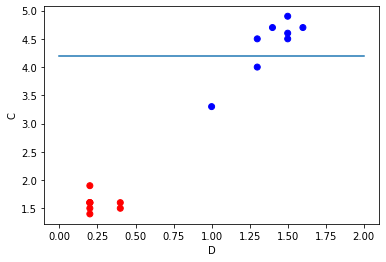

In [8]:
plt.scatter(data["D"],data["C"],c=cols) 
plt.xlim=(0,2)
plt.plot([0,2],[4.2,4.2]) 
plt.xlabel("D")
plt.ylabel("C")
#C,D都可以完全区分样本的类别。

In [9]:
from sklearn import tree
import pydot
%matplotlib inline
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data[["A","B","C","D"]], data[["E"]])

##注意：
dot_data = tree.export_graphviz(clf, out_file="temptree.dot", feature_names=["A","B","C","D"],
                                class_names=np.unique(data[["E"]]),
                                filled=True, rounded=True,)

##

[Text(334.8, 244.62, 'X[3] <= 0.7\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(167.4, 81.54000000000002, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(502.20000000000005, 81.54000000000002, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

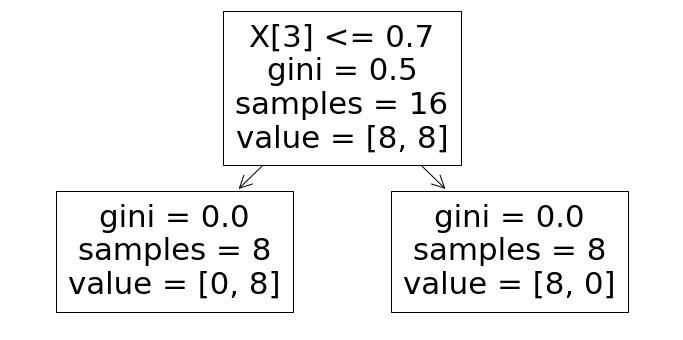

In [10]:
plt.figure(figsize=(12,6))
tree.plot_tree(clf)  

In [11]:
tree.plot_tree??

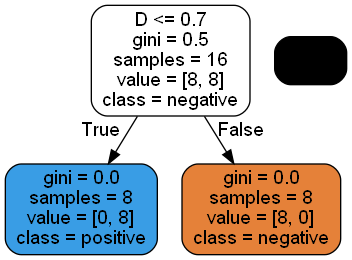

In [25]:
dot_file=r"./temptree.dot"
graph = pydot.graph_from_dot_file(dot_file)  
Image(graph[0].create_png())
 

In [26]:
#预测分类,
clf.predict([[2., 2.,2.,2]])


array(['negative'], dtype=object)

In [27]:
#预测概率
clf.predict_proba([[2., 2.,2,2]])

array([[1., 0.]])

下面看一个复杂一点的例子。

In [28]:
from sklearn.datasets import load_iris

data = load_iris()

data.feature_names,data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

+ 分别是花萼长度(cm)、花萼宽度(cm)、花瓣长度(cm)、花瓣宽度(cm)，
+ 山鸢尾花(Iris Setosa),变色鸢尾花(Iris Versicolor)和维吉尼亚鸢尾花(Iris Virginica)

https://blog.csdn.net/u013019338/article/details/87475669 

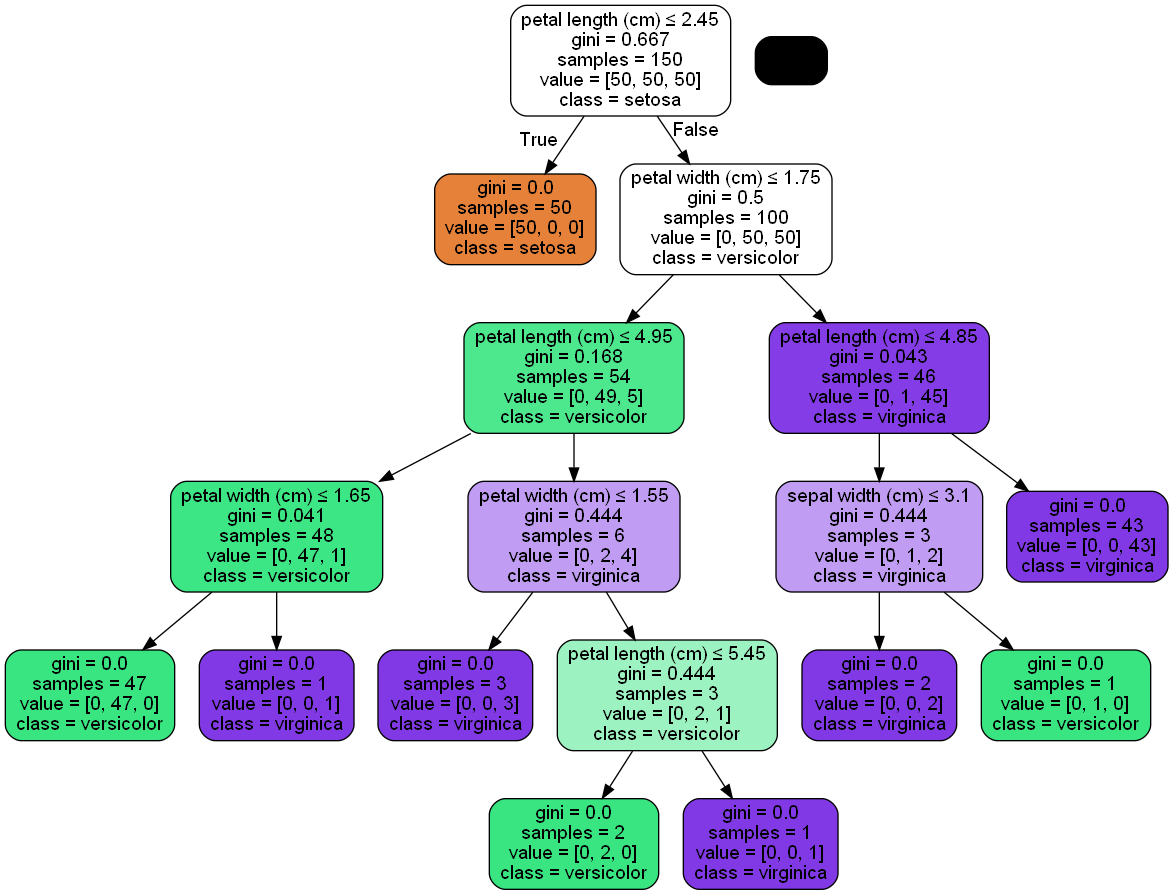

In [29]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data.data, data.target)

dot_data = tree.export_graphviz(clf, out_file="temptree.dot",
                                feature_names=data.feature_names,
                                class_names=data.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

dot_file=r'.\temptree.dot'
graph = pydot.graph_from_dot_file(dot_file)[0]  
Image(graph.create_png())
#写到pdf文件
#graph.write_pdf("iris1.pdf")